<h1>Inserting CSV Data into a SQLite Table</h1>
<p><b>For SMASH CS Fundamentals II: Data Analysis</b>
<br>This is a quick guide on how to insert CSV data into your SQLite tables via Python.
<br>I'll also provide a simple example of how you might visualize the <b>oil pipelines accidents dataset</b>.
<p>Link to dataset (courtesy of Kaggle and the US Department of Transportation):
<a href="https://docs.google.com/spreadsheets/d/1OUXShCPbmqqMvYxHcFlEjFBD68lnYxwyNIxheWW1Xx0/edit?usp=sharing">https://docs.google.com/spreadsheets/d/1OUXShCPbmqqMvYxHcFlEjFBD68lnYxwyNIxheWW1Xx0/edit?usp=sharing</a>

<h2>Getting started</h2>
<br>Your first step should be making your own copy of that dataset on Google Docs.
<br>Cut and paste that first row into a separate document and call it "oil dataset key."
<br>This can help you recall what those columns are since the data itself doesn't tell you much.
<br>Then, download the dataset as a <b>CSV</b> ("comma separated values") file. 
<br>Be sure to place the CSV in the same location as your Python file.
<img src="save.png" alt="save.png">
</p>

<h2>Preparing the data, or "data wrangling"</h2>
<br>Note that Kaggle, the USDOT, and I myself done quite a lot of pre-cleaning for you.
<br>That's why this dataset looks (mostly) neat and tidy. 
<br>It's not perfect. There are missing values for some records, for example.
<br>But generally it's at least formatted and ready to go for SQL and Python.
<br>The process of formatting and preparing raw data for analysis is called <b>"data wrangling"</b> (or "data munging").
<br>In the real world, much of your time would have been spent on this step alone.
<br>Don't you love me?</p>

<h2>Import libraries</h2>
<p>This time we're going to import the csv package in addition to those you've already used.</p>

In [1]:
import sqlite3
import csv
import matplotlib.pyplot as plt

<h2>Insert the CSV data</h2>
<p>Most of this is very straightfoward.
<br>Read the comments to follow what is going on.
</p>

In [2]:
# This part is just like last time. 
# We are getting our fields from the CSV file. 
conn = sqlite3.connect("oil.db")
cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS Accidents")
cur.execute("CREATE TABLE Accidents ("
           "id INTEGER PRIMARY KEY, "
           "year INTEGER, "
           "operatorID INTEGER, "
           "operatorName TEXT, "
           "state TEXT, "
           "pipelineLocation TEXT, "
           "pipelineType TEXT, "           
           "cause TEXT, "
           "liquidType TEXT, "
           "ignition INTEGER, "
           "explosion INTEGER, "
           "injuries INTEGER, "
           "deaths INTEGER, "
           "oilLoss REAL, "
           "costs INTEGER)")

# Insert the CSV data into the database.
file = open("oil pipeline accidents dataset.csv")
csv_file = csv.reader(file)
for row in csv_file:
    cur.execute("INSERT INTO Accidents VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", 
                (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7],
                 row[8], row[9], row[10], row[11], row[12], row[13], row[14]))
conn.commit()

# Tests
cur.execute("SELECT state FROM Accidents LIMIT 10")
print(cur.fetchall())
cur.execute("SELECT COUNT(*) FROM Accidents")
print("Total number of records =", cur.fetchone()[0])

[('KS',), ('ME',), ('LA',), ('WI',), ('TX',), ('ND',), ('TX',), ('TX',), ('TX',), ('TX',)]
Total number of records = 2795


<h2>Analyze the data</h2>
<p>This part you should be familiar with. But I'll show you a few new tricks here too.
<br>You've learned how to calculate some statistics, as well as visualize in several ways.
<br>Below I'll just provide an example of how you might analyze the data with visualization.
<br>Let's figure out how many accidents there are per cause category.
</p>

In [3]:
# Get the cause categories in a list. 
# SELECT DISTINCT just fetches all the unique values.
# Great for categorical variables, like "cause category" here.
causes = []
cur.execute("SELECT DISTINCT cause FROM Accidents")
for row in cur:
    causes.append(row[0])
print(causes)
    
# Now we just need to know how many accidents there are per cause category.
accidents_per_cause = []
for c in causes:
    cur.execute("SELECT COUNT(*) FROM Accidents WHERE cause = ?", (c,));
    accidents_per_cause.append(cur.fetchone()[0])
print(accidents_per_cause)

['INCORRECT OPERATION', 'MATERIAL/WELD/EQUIP FAILURE', 'NATURAL FORCE DAMAGE', 'EXCAVATION DAMAGE', 'ALL OTHER CAUSES', 'CORROSION', 'OTHER OUTSIDE FORCE DAMAGE']
[378, 1435, 118, 97, 118, 592, 57]


<p>Let's create a bar chart to visualize the differences between cause categories.</p>

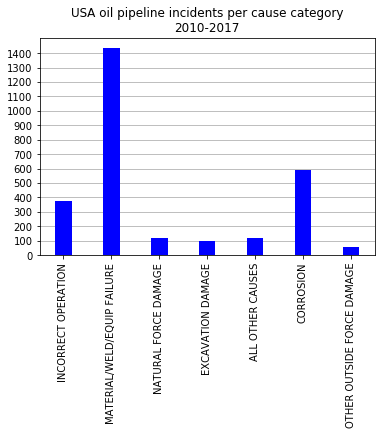

In [4]:
# Setup
bar_width = 0.35
x_range = list(range(0, len(causes), 1))
y_range = list(range(0, 1500, 100))
plt.rc("axes", axisbelow=True)
plt.figure(1)
plt.xticks(x_range, causes, rotation=90)
plt.yticks(y_range)
plt.grid(axis="y")
plt.title("USA oil pipeline incidents per cause category\n2010-2017")

# Draw the bar graph.
plt.bar(x_range, accidents_per_cause, width=bar_width, color="blue")

# Show the bar graph.
plt.show()

<p>A horizontal bar chart might be easier on the eyes.</p>

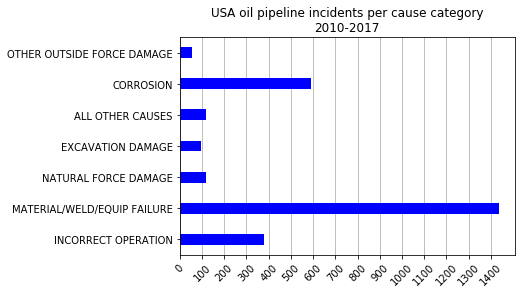

In [5]:
# Setup
plt.figure(2)
plt.xticks(y_range, rotation=45)
plt.yticks(x_range, causes)
plt.grid(axis="x")
plt.title("USA oil pipeline incidents per cause category\n2010-2017")

# Draw the bar graph.
plt.barh(x_range, accidents_per_cause, height=bar_width, color="blue")

# Show the bar graph.
plt.show()

<p>See the benefit of EDA? 
<br>What was once just a spreadsheet full of values has turned into a beautiful bar chart.
<br>You can see at a glance some information about oil pipeline accidents.
<br>Based on this information, what might you investigate further?
<br>Perhaps you might like to know what is causing equipment to fail and corrode? 
<br>Or maybe that's not enough? Maybe we should also see what the most costly causes are?
<br>What if "incorrect operation" actually causes more injuries and deaths when it happens?
<br>These are just some of many examples of how you might take this further.</p>

In [6]:
# As always, close your connection to the database.
conn.close()

<h2>That's all!</h2>
<p>As I told you, inserting data from a CSV is very straightforward.
<br>The tough part is wrangling the data in the first place. 
<br>Data wrangling is outside the scope of this 5 week intro course (thank goodness).
<br>So I strongly recommend using a prepared dataset like this one for your final project.
<br>And by the way, I've also created a guide to help you with that... using Pokemon!
<br>Your teacher will provide you a link. Check it out!
</p>